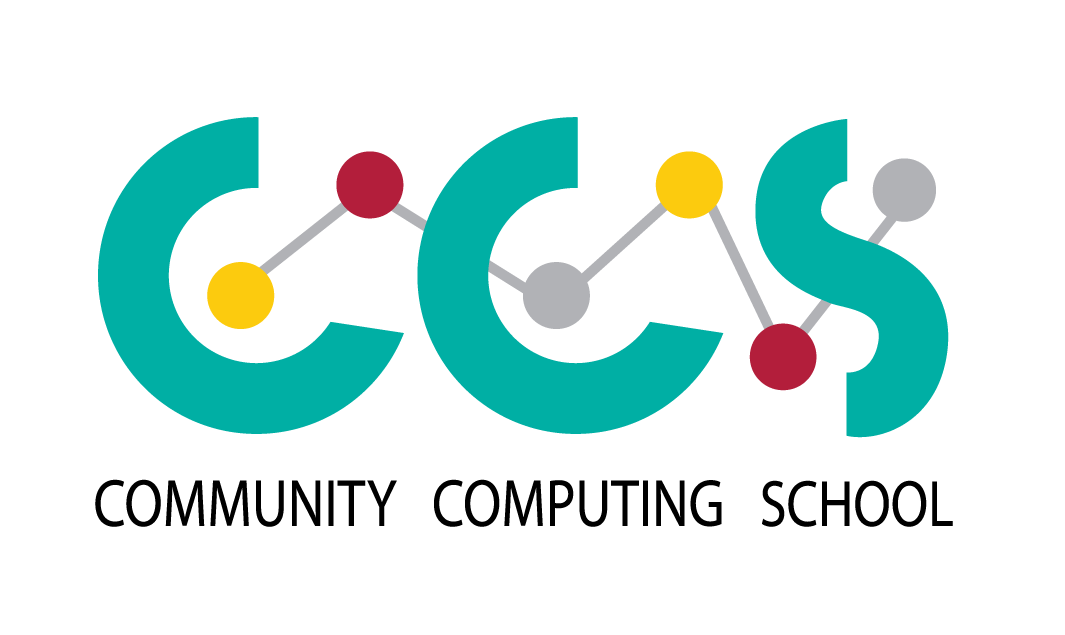

# Linear Regression Using SGD

## Estimate linear regression coefficients using Stochastic Gradient Descent: 

* Stochastic gradient descent requires two parameters:
    * **Learning Rate:** Used to limit the amount that each coefficient is corrected each time it is updated.
    * **Epochs:** The number of times to run through the training data while updating the coefficients.

* There are 3 loops we need to perform in the function:
    1. Loop over each epoch.
    2. Loop over each row in the training data for an epoch.
    3. Loop over each coefficient and update it for a row in an epoch.

* we update each coefficient for each row in the training data, each epoch. Coefficients are updated based on the error the model made. The error is calculated as the difference between the prediction made with the candidate coefficients and the expected output value.

* There is one coefficient to weight each input attribute, and these are updated in a consistent way, for example:

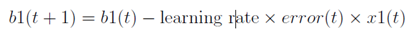

* The special coefficient at the beginning of the list, also called the intercept or the bias, is updated in a similar way, except without an input as it is not associated with a specific input value:

In [67]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [68]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(X_train, y_train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(X_train[0]))]
    for _ in range(n_epoch):
        for i, row in enumerate(X_train):
            yhat = predict(row, coef)
            error = yhat - y_train.values[i]
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
            # print(l_rate, n_epoch, error)
    return coef

In [69]:
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(X_train, y_train, X_test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(X_train, y_train, l_rate, n_epoch)
    for row in X_test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)

In [70]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
df = pd.read_csv("../DataSet/winequality-white.csv",sep=';')

In [72]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [74]:
df["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [75]:
X = df.drop("quality",axis=1)
y = df["quality"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
l_rate = 0.01
n_epoch = 50

In [81]:
y_hats = linear_regression_sgd(X_train, y_train, X_test, l_rate, n_epoch)

In [82]:
np.sqrt(mean_squared_error(y_test, y_hats))

0.7649807349809269

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
model = LinearRegression()

In [85]:
model.fit(X_train, y_train)

LinearRegression()

In [86]:
y_hat = model.predict(X_test)

In [87]:
np.sqrt(mean_squared_error(y_test,y_hat))

0.7467106481457051